<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-к-обучению" data-toc-modified-id="Подготовка-к-обучению-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка к обучению</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span></li></ul></div>

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import cv2
import json

import os
from pycocotools.coco import COCO
import fiftyone as fo
import fiftyone.zoo as foz
from fastai.vision.all import *
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import warnings
warnings.filterwarnings('ignore')
import skimage.io as io
import matplotlib.pyplot as plt

In [63]:
# Paths to the COCO annotation file and images
annotation_path = (
    r"C:\Users\olga.poletkina\Documents\jupiter_notebooks\UrbanCode"
    r"\urbanhack-train\urbanhack-train\annotations\instances_default.json"
)
image_dir = (
    r"C:\Users\olga.poletkina\Documents\jupiter_notebooks\UrbanCode"
    r"\urbanhack-train\urbanhack-train\images"
)
# Create a COCO object
coco = COCO(annotation_path)

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


In [64]:
coco.info()

contributor: 
date_created: 
description: 
url: 
version: 
year: 


In [65]:
categories = coco.loadCats(coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

Custom COCO categories: 
window empty filled



In [66]:
# coco.anns

In [67]:
pd.DataFrame(coco.anns).T

,id,image_id,category_id,segmentation,area,bbox,iscrowd,attributes
1,1,1,2,[],12677.0917,"[98.87, 141.25, 110.63, 114.59]",0,"{'occluded': False, 'rotation': 0.0}"
2,2,1,2,[],16279.1769,"[723.17, 184.07, 130.83, 124.43]",0,"{'occluded': False, 'rotation': 0.0}"
3,3,1,2,[],13944.2534,"[475.7, 48.84, 116.62, 119.57]",0,"{'occluded': False, 'rotation': 0.0}"
4,4,1,2,[],13847.1183,"[593.81, 62.38, 118.89, 116.47]",0,"{'occluded': False, 'rotation': 0.0}"
5,5,1,2,[],10862.957,"[0.0, 259.95, 81.34, 133.55]",0,"{'occluded': False, 'rotation': 0.0}"
...,...,...,...,...,...,...,...,...
38327,38327,252,2,[],281438.14,"[0.0, 1383.28, 480.68, 585.5]",0,"{'occluded': False, 'rotation': 0.0}"
38328,38328,252,2,[],294588.0,"[0.0, 919.61, 630.0, 467.6]",0,"{'occluded': False, 'rotation': 0.0}"
38329,38329,252,2,[],260243.7787,"[119.17, 510.94, 624.79, 416.53]",0,"{'occluded': False, 'rotation': 0.0}"
38330,38330,252,2,[],191619.14,"[268.49, 173.01, 573.71, 334.0]",0,"{'occluded': False, 'rotation': 0.0}"


In [68]:
pd.DataFrame(coco.anns).T.columns

Index(['id', 'image_id', 'category_id', 'segmentation', 'area', 'bbox',
       'iscrowd', 'attributes'],
      dtype='object')

In [69]:
pd.DataFrame(coco.anns).T["attributes"].apply(lambda x: list(x.values())[1]).unique()

array([  0. , 359.2,   2.7, 358.6,   1.2,   1. , 358.5,   0.9,   0.8,
       357.9])

In [70]:
pd.DataFrame(coco.imgs).T

,id,width,height,file_name,license,flickr_url,coco_url,date_captured
1,1,854,572,0000019949building.jpg,0,,,0
2,2,881,720,0000019869building.jpg,0,,,0
3,3,847,544,0000019458building.jpg,0,,,0
4,4,303,600,0000019455building.jpg,0,,,0
5,5,869,676,0000019431building.jpg,0,,,0
...,...,...,...,...,...,...,...,...
248,248,4160,3120,20221212_151102.jpg,0,,,0
249,249,4160,3120,20221212_150454.jpg,0,,,0
250,250,4160,3120,20221212_145947.jpg,0,,,0
251,251,4160,3120,20221212_144915.jpg,0,,,0


In [71]:
pd.DataFrame(coco.imgs).T.columns

Index(['id', 'width', 'height', 'file_name', 'license', 'flickr_url',
       'coco_url', 'date_captured'],
      dtype='object')

In [72]:
pd.DataFrame(coco.cats).T

,id,name,supercategory
1,1,window,
2,2,empty,
3,3,filled,


In [73]:
images = coco.loadImgs(coco.getImgIds())

IndexError: index 6 is out of bounds for axis 0 with size 6

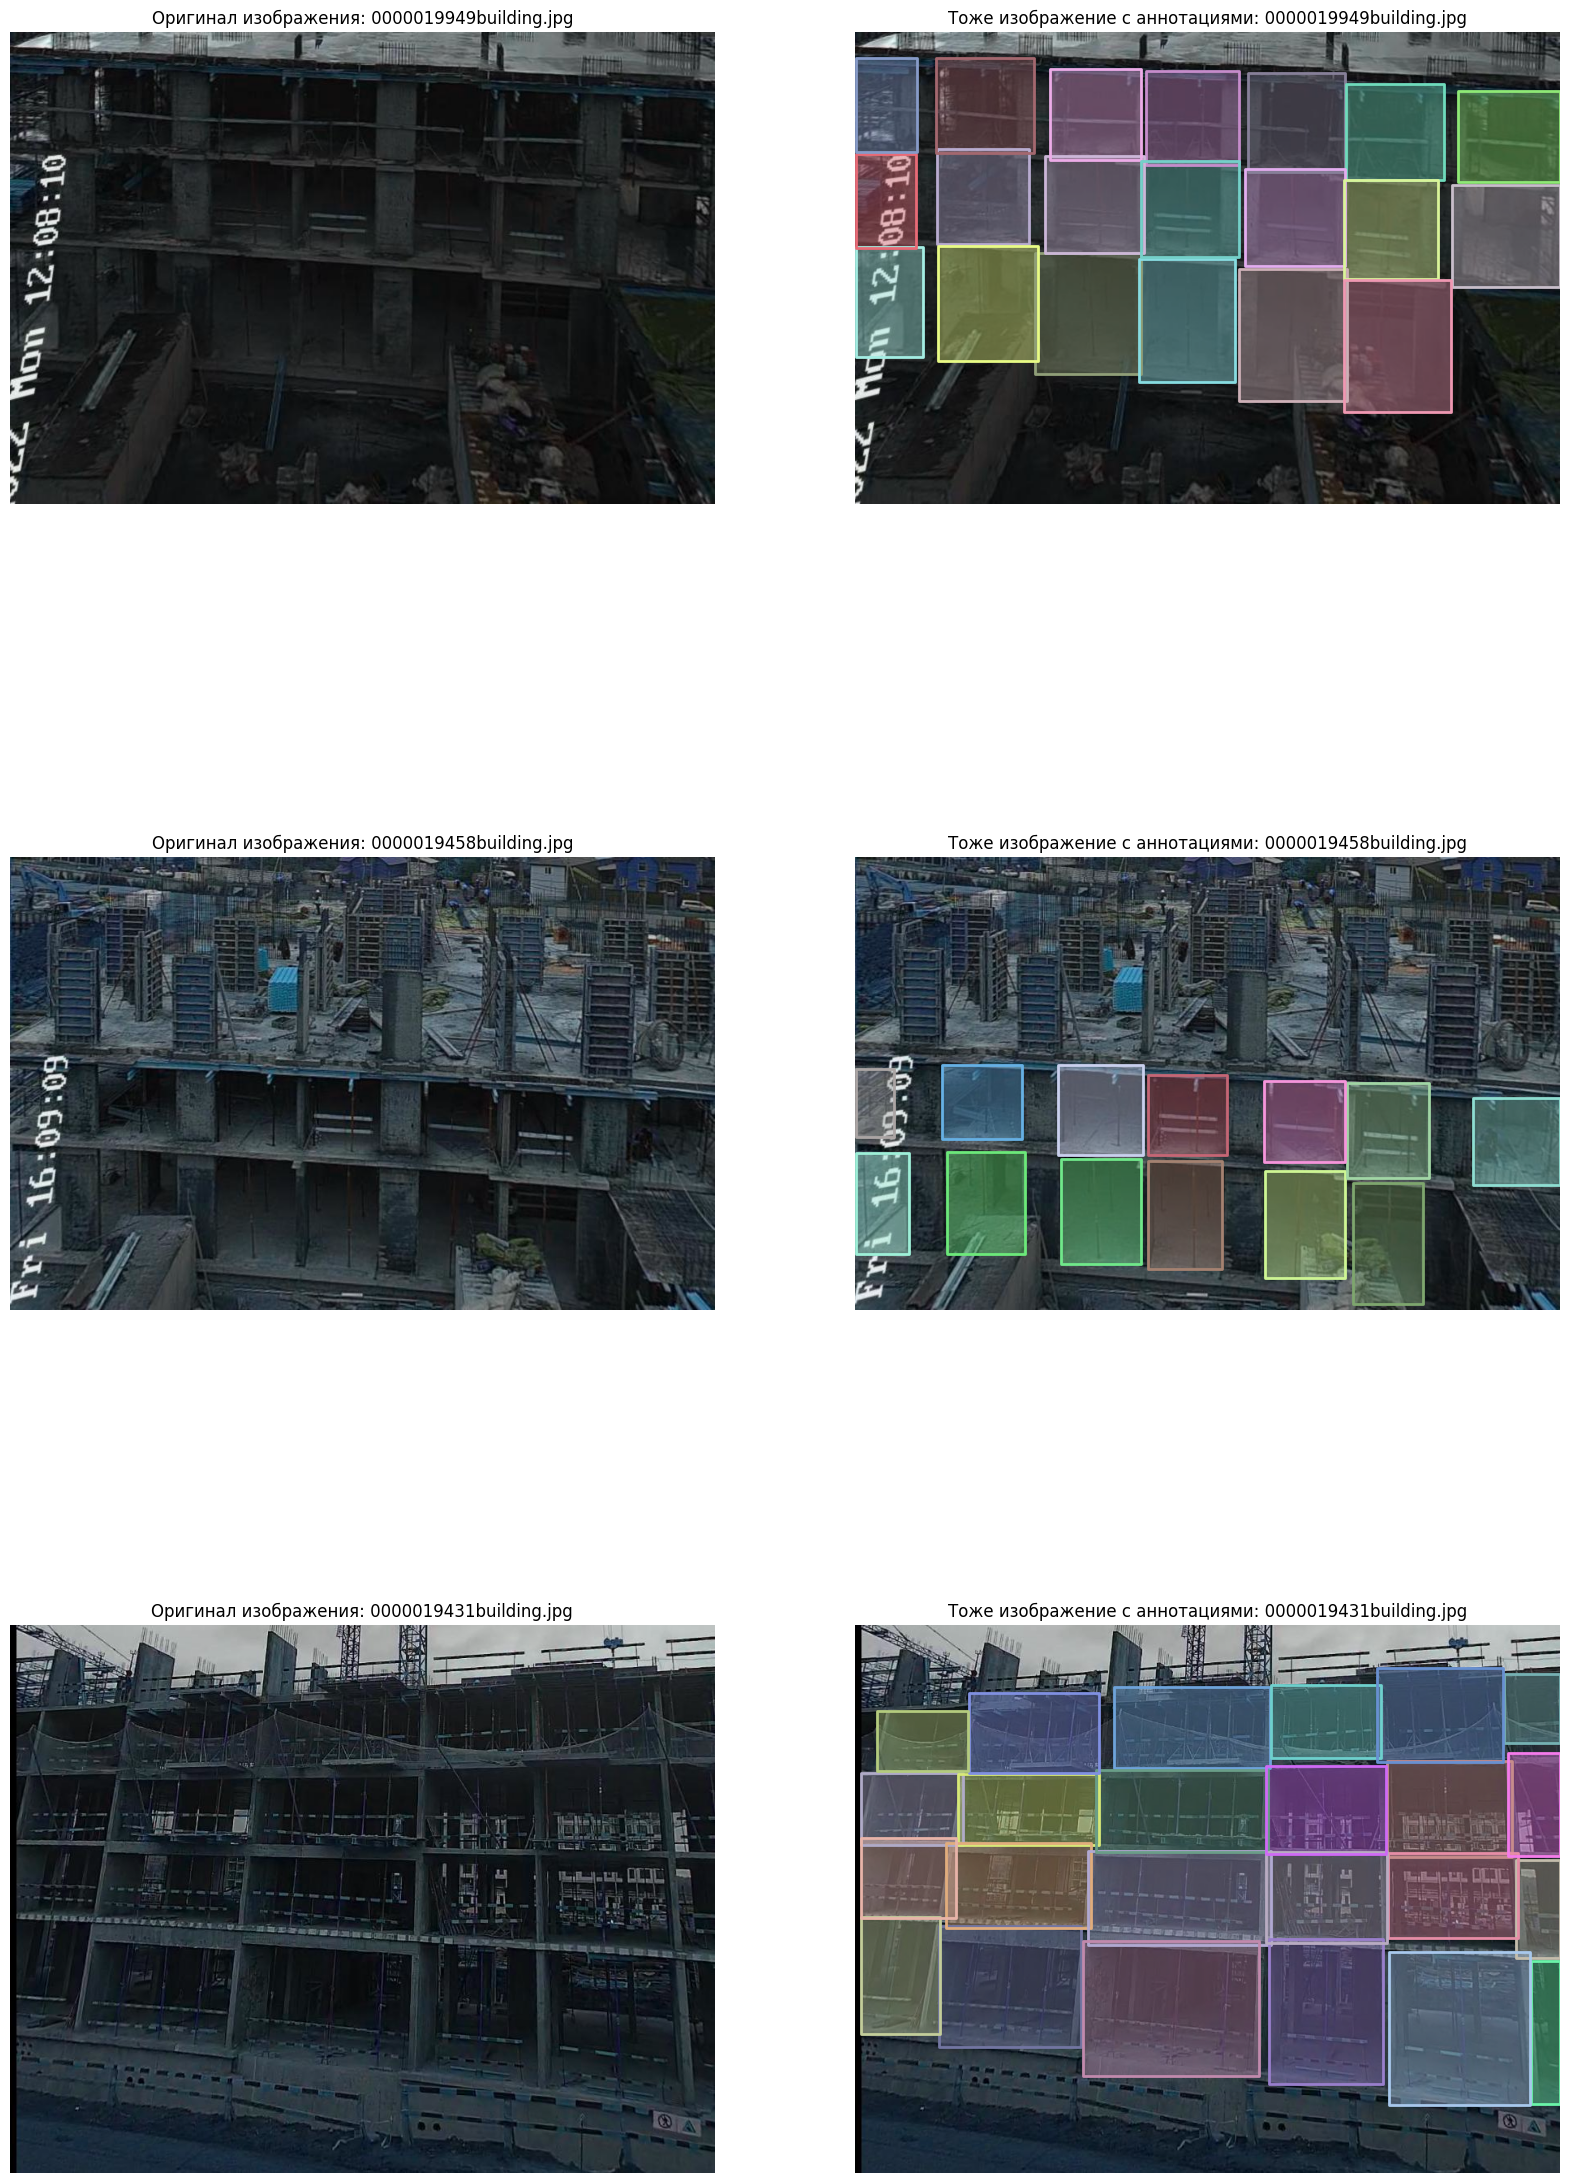

In [74]:
fig, ax = plt.subplots(nrows=3, ncols=2)
ax = ax.ravel()
fig.set_size_inches(20,30)

for i in range(0, 8, 2):
    img = images[i]
    im = cv2.imread(f"{image_dir}/{img['file_name']}")
    ax[i].axis('off')
    ax[i+1].axis('off')
    
    #само изображение
    ax[i].imshow(im)
    ax[i].set_title(f"Оригинал изображения: {img['file_name']}")
    #изображение с аннотациями (bbox)
    ax[i+1].imshow(im)
    ax[i+1].set_title(f"Тоже изображение с аннотациями: {img['file_name']}")
    #похоже у COCO нельзя вывести изображение на конкретный Axes
    plt.sca(ax[i+1])
    #получаем список id всех аннотация для конкретного id изображения
    annIds = coco.getAnnIds(imgIds=img['id'])
#     print(f"id аннотаций изображения {img['file_name']}: {annIds}")
    #загружаем сами аннотации, используя список id для каждого изображения
    anns = coco.loadAnns(annIds)
#     print(f"Аннотации:{json.dumps(anns, indent=4)}")
    #метод COCO API для визуализации изображения и аннотаций
    coco.showAnns(anns, draw_bbox=True)
plt.show()

In [76]:
import random

## Подготовка к обучению

In [75]:
with open(annotation_path, 'r') as f:
    data = json.load(f)

In [77]:
# Выделяем часть для валидации
val_ratio = 0.2

# Разделяем на train and validation
images = data['images']
random.shuffle(images)
num_val_images = int(val_ratio * len(images))
train_images = images[num_val_images:]
val_images = images[:num_val_images]

In [78]:
train_images

[{'id': 122,
  'width': 1102,
  'height': 576,
  'file_name': '0000000111building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 96,
  'width': 431,
  'height': 619,
  'file_name': '0000005135building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 53,
  'width': 449,
  'height': 960,
  'file_name': '0000012772building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 55,
  'width': 536,
  'height': 545,
  'file_name': '0000012650building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 115,
  'width': 1320,
  'height': 651,
  'file_name': '0000000972building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 184,
  'width': 1440,
  'height': 1220,
  'file_name': '0000028313building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 167,
  

In [79]:
# Разделим аннотации

train_image_ids = set([image['id'] for image in train_images])
val_image_ids = set([image['id'] for image in val_images])

train_annotations = [ann for ann in data['annotations'] if ann['image_id'] in train_image_ids]
val_annotations = [ann for ann in data['annotations'] if ann['image_id'] in val_image_ids]

In [80]:
train_annotations

[{'id': 1,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 12677.091699999999,
  'bbox': [98.87, 141.25, 110.63, 114.59],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 2,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 16279.176900000006,
  'bbox': [723.17, 184.07, 130.83, 124.43],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 3,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 13944.253400000007,
  'bbox': [475.7, 48.84, 116.62, 119.57],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 4,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 13847.118300000011,
  'bbox': [593.81, 62.38, 118.89, 116.47],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 5,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 10862.957000000002,
  'bbox': [0.0, 259.95, 81.34, 133.55],
  'i

In [81]:
# Создаем новые json

train_data = {
    'images': train_images,
    'annotations': train_annotations,
    'categories': data['categories']
}

val_data = {
    'images': val_images,
    'annotations': val_annotations,
    'categories': data['categories']
}

with open('train_annotations.json', 'w') as f:
    json.dump(train_data, f)

with open('val_annotations.json', 'w') as f:
    json.dump(val_data, f)

## Обучение

In [86]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
import torchvision.transforms as transforms
from torch.optim import SGD
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [107]:
class SimpleCocoTransforms:
    def __init__(self, resize_dims=None):
        """
        Инициализация класса преобразования.
        
        Параметры:
        - resize_dims (tuple): Размеры для изменения размера изображения. Например, (300, 300).
        """
        self.resize_dims = resize_dims

    def __call__(self, img, annotations):
        """
        Применить преобразования к изображению и его аннотациям.
        
        Параметры:
        - img (PIL.Image): Входное изображение.
        - annotations (список словарей): Список аннотаций, связанных с изображением.
        
        Возвращает:
        - Преобразованное изображение и его аннотации.
        """
        
        # Изменить размер изображения, если предоставлены размеры
        if self.resize_dims:
            img = F.resize(img, self.resize_dims)
            
            # Преобразовать списки или массивы numpy в аннотациях в тензоры PyTorch
            annotations = [
                {key: (torch.tensor(value) if isinstance(value, (list, np.ndarray)) else value) for key, value in annotation.items()}
                for annotation in annotations
            ]
            
        # Преобразовать изображение в тензор PyTorch
        img_tensor = F.to_tensor(img)
        
        return img_tensor, annotations

# Создать экземпляр класса преобразования с указанными размерами для изменения размера
transform = SimpleCocoTransforms(resize_dims=(300, 300))

In [108]:
# Создаем датасеты для тренировки и валидации
# Здесь мы используем класс CocoDetection для загрузки изображений и их аннотаций

# Датасет для тренировки
train_dataset = CocoDetection(root=image_dir, 
                              annFile='train_annotations.json', 
                              transforms=transform)

# Датасет для валидации
val_dataset = CocoDetection(root=image_dir, 
                            annFile='val_annotations.json', 
                            transforms=transform)

# Создаем загрузчики данных (DataLoaders) для эффективной загрузки пакетов данных во время обучения
# collate_fn здесь используется для правильной группировки данных

# Загрузчик данных для тренировки
train_loader = DataLoader(train_dataset, 
                          batch_size=4, 
                          shuffle=True, 
                          collate_fn=lambda x: tuple(zip(*x)))

# Загрузчик данных для валидации
val_loader = DataLoader(val_dataset, 
                        batch_size=4, 
                        collate_fn=lambda x: tuple(zip(*x)))

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [110]:
# Определение устройства: используйте CUDA (GPU), если оно доступно, иначе CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Загрузка предобученной модели Faster R-CNN с backbone на основе ResNet-50
model = fasterrcnn_resnet50_fpn(pretrained=True)

# Указание числа классов: 2 класса объекта + 1 класс фона
num_classes = 3

# Замена "головы" модели для классификации на новую, соответствующую нашему числу классов
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Перемещение модели на выбранное устройство (CUDA или CPU)
model.to(device)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [111]:
# Получаем список всех параметров модели, которые можно обучать (т.е. для которых можно вычислить градиенты)
params = [p for p in model.parameters() if p.requires_grad]

# Создание оптимизатора Stochastic Gradient Descent (Стохастический градиентный спуск) с определенными параметрами
# lr - скорость обучения
# momentum - момент (помогает ускорить SGD в соответствующем направлении и подавляет колебания)
# weight_decay - регуляризация, которая предотвращает переобучение путем штрафования больших значений весов
optimizer = SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)

In [115]:
# Параметры
num_epochs = 10
print_every = 10  # печатаем статистику каждые 10 итераций

# Обучение модели
for epoch in range(num_epochs):
    model.train()  # Переключение модели в режим обучения
    total_loss = 0
    running_loss = 0  # потери для текущего блока итераций

    # Проход по всему обучающему набору данных
    for i, (images, annotations) in enumerate(train_loader):
        images = [img.to(device) for img in images]

        annotations = [{k: v.to(device) if torch.is_tensor(v) else v for k, v in t.items()} for t in annotations]

        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        loss_dict = model(images, annotations)

        # Считаем общую потерю
        losses = sum(loss for loss in loss_dict.values())
        running_loss += losses.item()
        total_loss += losses.item()

        # Обратный проход и оптимизация
        losses.backward()
        optimizer.step()

        # Выводим статистику потерь каждые print_every итераций
        if (i + 1) % print_every == 0:
            print(f"Эпоха {epoch+1}/{num_epochs}, Итерация {i+1}/{len(train_loader)}, Средняя потеря: {running_loss/print_every}")
            running_loss = 0

    # Выводим среднюю потерю за эпоху
    print(f"Эпоха {epoch+1}/{num_epochs}, Потеря за эпоху: {total_loss/len(train_loader)}")

AttributeError: 'list' object has no attribute 'items'